In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
URL2017 <- "https://drive.google.com/uc?id=11RimvDwqEXhi88RdmiHg6PUGOL8xXMW4&export=download"
URL2018 <- "https://drive.google.com/uc?id=1vA-vnvTlHoXV1q6bu4S_qay37nz7X3UM&export=download"
URL2019 <- "https://drive.google.com/uc?id=1kBSEJl-JCIzqzVmB9PMLZ-C2WM1hH7je&export=download"
URL2020 <- "https://drive.google.com/uc?id=1zaTH_62fMJNYMjWItzjSvrK3nKdK74Zn&export=download"
URL2021 <- "https://drive.google.com/uc?id=1Inz166gXuGusb47PhV6nQMEpxpl4Wh92&export=download"
URL2022 <- "https://drive.google.com/uc?id=1vUUblkLnMKSxb8S0y55Zi3IHjfIZOJ2N&export=download"
cr2017 <- read.csv(URL2017)
cr2018 <- read.csv(URL2018)
cr2019 <- read.csv(URL2019)
cr2020 <- read.csv(URL2020)
cr2021 <- read.csv(URL2021)
cr2022 <- read.csv(URL2022)

In [3]:
# combine 6 years into one dataframe
cr2017_2022 <- rbind(cr2017,cr2018,cr2019,cr2020,cr2021,cr2022)
head(cr2017_2022)

# only select the TYPE, YEAR, MONTH, DAY and NEIGHBOURHOOD for analysis
crime2017_2022 <- cr2017_2022 %>% 
    select(TYPE, YEAR, MONTH, DAY, NEIGHBOURHOOD) 
head(crime2017_2022)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2017,11,29,20,0,29XX SKEENA ST,Renfrew-Collingwood,497919.2,5456148
2,Theft of Vehicle,2017,6,21,21,0,2X JACKSON AVE,Strathcona,493220.8,5459096
3,Theft of Vehicle,2017,9,21,18,0,2X W 14TH AVE,Mount Pleasant,492319.5,5456190
4,Theft of Vehicle,2017,5,9,15,30,2X W PENDER ST,Central Business District,492338.0,5458667
5,Theft of Vehicle,2017,10,9,6,0,2XX ALEXANDER ST,Strathcona,492802.5,5459038
6,Theft of Vehicle,2017,6,13,6,45,2XX CENTRAL ST,Strathcona,492756.6,5457623


,TYPE,YEAR,MONTH,DAY,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<chr>
1,Theft of Vehicle,2017,11,29,Renfrew-Collingwood
2,Theft of Vehicle,2017,6,21,Strathcona
3,Theft of Vehicle,2017,9,21,Mount Pleasant
4,Theft of Vehicle,2017,5,9,Central Business District
5,Theft of Vehicle,2017,10,9,Strathcona
6,Theft of Vehicle,2017,6,13,Strathcona


In [4]:
# overal daily total crime incidents for each neighborhood in each year
crime_total <- crime2017_2022 %>%
    group_by(YEAR, MONTH, DAY, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD != "") %>%
    summarise(total = n(), `.groups` = "drop")
head(crime_total)

YEAR,MONTH,DAY,NEIGHBOURHOOD,total
<int>,<int>,<int>,<chr>,<int>
2017,1,1,Arbutus Ridge,1
2017,1,1,Central Business District,27
2017,1,1,Dunbar-Southlands,1
2017,1,1,Fairview,5
2017,1,1,Grandview-Woodland,7
2017,1,1,Hastings-Sunrise,8


In [5]:
# daily analysis 
# daily average crime incidents for each neighborhood in each year
crime_daily_avg <- crime_total %>%
    group_by(YEAR, DAY, NEIGHBOURHOOD) %>%
    summarise(daily_avg = mean(total), `.groups` = "drop")

# daily median  for crime incidents for each neighborhood in each year
crime_daily_median <- crime_total %>%
    group_by(YEAR, DAY, NEIGHBOURHOOD) %>%
    summarise(daily_median = median(total), `.groups` = "drop")

# daily standard deviation for crime incidents for each neighborhood in each year
crime_daily_sd <- crime_total %>%
    group_by(YEAR, DAY, NEIGHBOURHOOD) %>%
    summarise(daily_sd = sd(total), `.groups` = "drop")

summary_stats_on_daily <- cbind(crime_daily_avg,crime_daily_median,crime_daily_sd) %>%
    select(c(1,2,3,4,8,12))
head(summary_stats_on_daily)

,YEAR,DAY,NEIGHBOURHOOD,daily_avg,daily_median,daily_sd
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2017,1,Arbutus Ridge,1.444444,1.0,0.8819171
2,2017,1,Central Business District,36.583333,35.5,9.0096749
3,2017,1,Dunbar-Southlands,2.125000,1.5,1.7268882
4,2017,1,Fairview,6.666667,6.0,3.7009417
5,2017,1,Grandview-Woodland,6.583333,6.0,3.0289012
6,2017,1,Hastings-Sunrise,5.000000,5.5,2.3741027


In [6]:
# yearly analysis
# yearly average crime incidents for each neighborhood
crime_yearly_avg <- crime_total %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarise(yearly_avg = mean(total), `.groups` = "drop")

# yearly median for crime incidents for each neighborhood
crime_yearly_median <- crime_total %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarise(yearly_median = median(total), `.groups` = "drop")

# yearly standard deviation for crime incidents for each neighborhood
crime_yearly_sd <- crime_total %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarise(yearly_sd = sd(total), `.groups` = "drop")

summary_stats_on_year <- cbind(crime_yearly_avg,crime_yearly_median,crime_yearly_sd) %>%
    select(c(1,2,3,6,9))
head(summary_stats_on_year)

,YEAR,NEIGHBOURHOOD,yearly_avg,yearly_median,yearly_sd
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2017,Arbutus Ridge,1.829787,1,1.126965
2,2017,Central Business District,36.673973,37,8.565873
3,2017,Dunbar-Southlands,2.051383,2,1.215528
4,2017,Fairview,5.988950,6,2.813676
5,2017,Grandview-Woodland,6.617080,6,3.196067
6,2017,Hastings-Sunrise,4.056497,4,2.132223


In [7]:
# monthly analysis
# monthly average crime incidents per day for all neighbourhoods
crime_monthly_avg <- crime_total %>%
    group_by(YEAR,MONTH, NEIGHBOURHOOD) %>%
    summarise(monthly_avg = mean(total), `.groups` = "drop")
#head(crime_monthly_avg)

# monthly median crime incidents per day for all neighbourhoods
crime_monthly_median <- crime_total %>%
    group_by(YEAR,MONTH, NEIGHBOURHOOD) %>%
    summarise(monthly_median = median(total), `.groups` = "drop")
#head(crime_monthly_median)

# monthly standard deviation crime incidents per day for all neighbourhoods
crime_monthly_sd <- crime_total %>%
    group_by(YEAR,MONTH, NEIGHBOURHOOD) %>%
    summarise(monthly_sd = sd(total), `.groups` = "drop")
#head(crime_monthly_sd)

summary_stats_on_month <- cbind(crime_monthly_median,crime_monthly_avg,crime_monthly_sd) %>%
    select(c(1,2,3,4,8,12))
head(summary_stats_on_month)

,YEAR,MONTH,NEIGHBOURHOOD,monthly_median,monthly_avg,monthly_sd
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2017,1,Arbutus Ridge,1.0,1.470588,0.8744746
2,2017,1,Central Business District,31.0,30.645161,8.3128350
3,2017,1,Dunbar-Southlands,1.5,2.000000,1.3377121
4,2017,1,Fairview,4.0,4.193548,2.1972612
5,2017,1,Grandview-Woodland,4.0,4.833333,2.7175462
6,2017,1,Hastings-Sunrise,3.0,3.344828,1.8376200


In [8]:
# highest average daily cirme incident rate
daily_highest <- max(crime_daily_avg$daily_avg)
highest_area <- crime_daily_avg$NEIGHBOURHOOD[which.max(crime_daily_avg$daily_avg)]
daily_highest
highest_area

# lowest average daily cirme incident rate
daily_lowest <- min(crime_daily_avg$daily_avg)
lowest_area <- crime_daily_avg$NEIGHBOURHOOD[which.min(crime_daily_avg$daily_avg)]
daily_lowest
lowest_area

[1] 53.33333

[1] "Central Business District"

[1] 1

[1] "Musqueam"

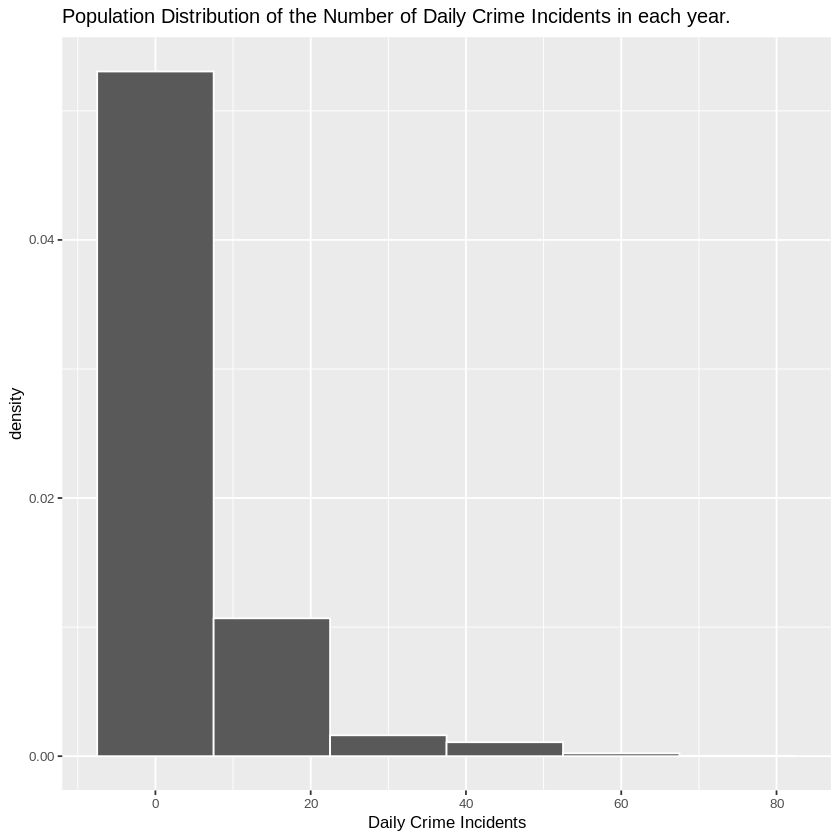

In [9]:
# visualization : population distribution
pop_dist <- crime_total %>%
    ggplot() + 
    geom_histogram(aes(x = total, y = ..density..), binwidth = 15, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Daily Crime Incidents") +
    ggtitle("Population Distribution of the Number of Daily Crime Incidents in each year.")
pop_dist

DAY,replicate,sample_mean
<int>,<int>,<dbl>
1,1,5.666667
1,2,3.583333
1,3,4.166667
1,4,10.500000
1,5,5.125000
1,6,7.533333


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 3500 row(s) containing missing values (geom_path).”


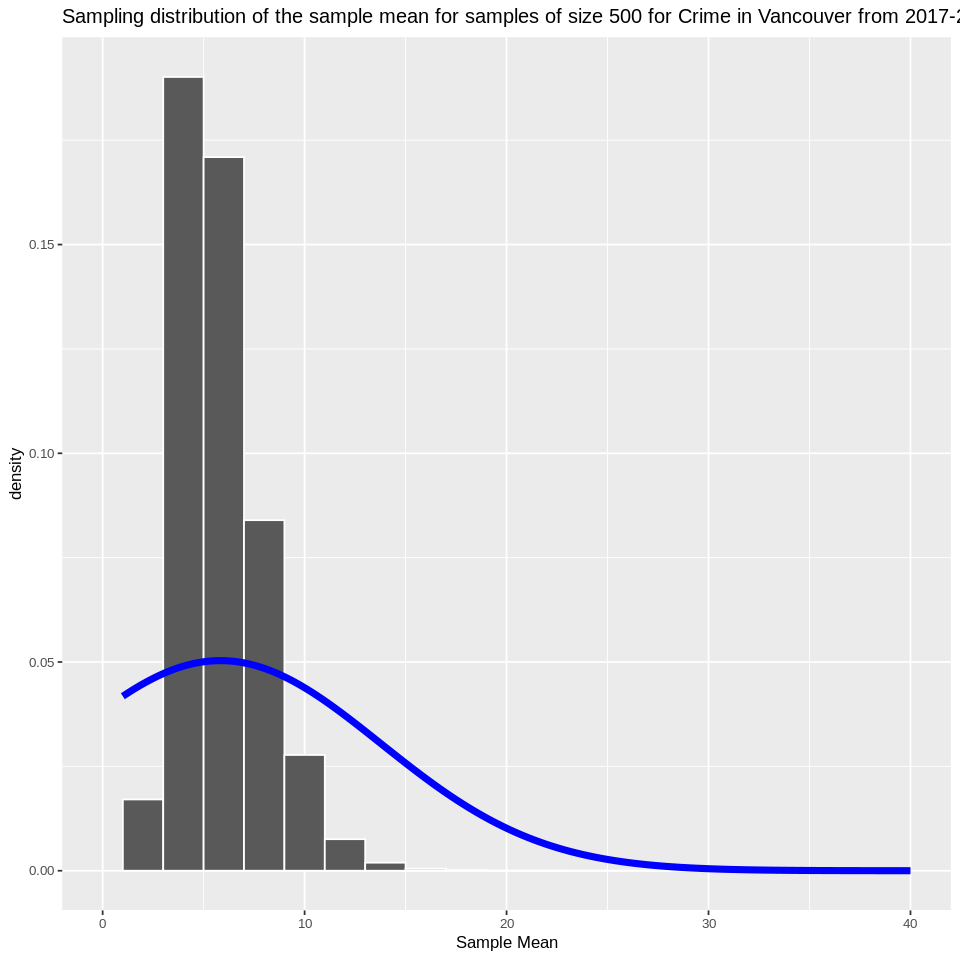

In [10]:
# CLT with sample size 500
set.seed(30)
pop_mu <- mean(crime_total$total)
pop_sd <- sd(crime_total$total)


sample_500 <- crime_total %>%
    rep_sample_n(size = 500, reps = 10000, replace = FALSE) %>%
    group_by(DAY, replicate) %>% 
    summarise(sample_mean = mean(total), `.groups` = "drop")
head(sample_500)

data_normal <- tibble(total=seq(min(crime_total$total), 
                                max(crime_total$total),0.01), 
                                density = dnorm(total, pop_mu, pop_sd))

options(repr.plot.width = 8, repr.plot.height = 8)
sampling_dist_500 <- sample_500 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_mean, y = ..density..), binwidth = 2, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Sample Mean") +
    ggtitle("Sampling distribution of the sample mean for samples of size 500 for Crime in Vancouver from 2017-2022.") + 
    scale_x_continuous(limits = c(0,40)) +
    geom_line(data = data_normal, aes(total, density), color = "blue", lwd = 2)
sampling_dist_500

DAY,replicate,sample_mean
<int>,<int>,<dbl>
1,1,3.187500
1,2,5.764706
1,3,6.214286
1,4,5.000000
1,5,4.692308
1,6,4.421053


Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 3500 row(s) containing missing values (geom_path).”


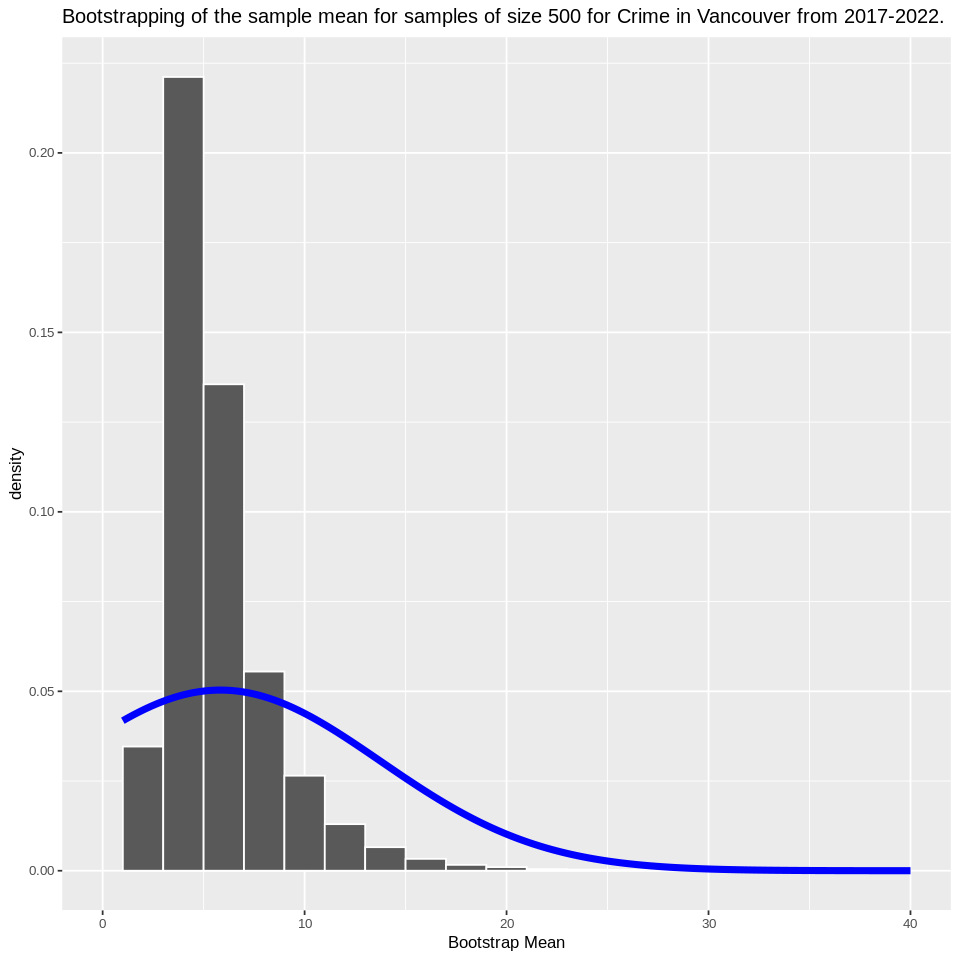

In [11]:
# Bootstrap with sample size 500
set.seed(31)
one_sample <- crime_total %>%
    rep_sample_n(size = 500, reps = 1, replace = FALSE)
boot_500 <- one_sample %>%
    rep_sample_n(size = 500, reps = 10000, replace = TRUE) %>%
    group_by(DAY, replicate) %>% 
    summarise(sample_mean = mean(total), `.groups` = "drop")
head(boot_500)

bootstrap_500 <- boot_500 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_mean, y = ..density..), binwidth = 2, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Bootstrap Mean") +
    ggtitle("Bootstrapping of the sample mean for samples of size 500 for Crime in Vancouver from 2017-2022.") + 
    scale_x_continuous( limits = c(0,40)) +
    geom_line(data = data_normal, aes(total, density), color = "blue", lwd = 2)
bootstrap_500

In [13]:
## Hypothesis Testing
crime2017_2019 <- crime_total %>%
    filter(YEAR == 2017:2019) 
n1 = sum(crime2017_2019$total)
mu1 = mean(crime2017_2019$total)
sd1 = sd(crime2017_2019$total)
crime2020_2022 <- crime_total %>%
    filter(YEAR == 2020:2022)
n2 = sum(crime2020_2022$total)
mu2 = mean(crime2020_2022$total)
sd2 = sd(crime2020_2022$total)
print(c("mu = ", mu1, mu2))
print(c("sd = ", sd1, sd2))

tt <- (mu1-mu2)/sqrt(sd1^2/n1+sd2^2/n2)
tt

pvalue <- pt(tt, df = n1-1, lower.tail = FALSE)
pvalue

Warning message in YEAR == 2017:2019:
“longer object length is not a multiple of shorter object length”
Warning message in YEAR == 2020:2022:
“longer object length is not a multiple of shorter object length”


[1] "mu = "            "6.43636617359754" "4.97995039272427"
[1] "sd = "            "9.06560167347133" "6.11144950129197"


[1] 25.23051

[1] 8.225943e-140